In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [77]:
url = 'https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv'
df = pd.read_csv(url)
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [78]:
df.shape

(158, 12)

In [79]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

Country and region are object type and all other columns are numerical type

<AxesSubplot:>

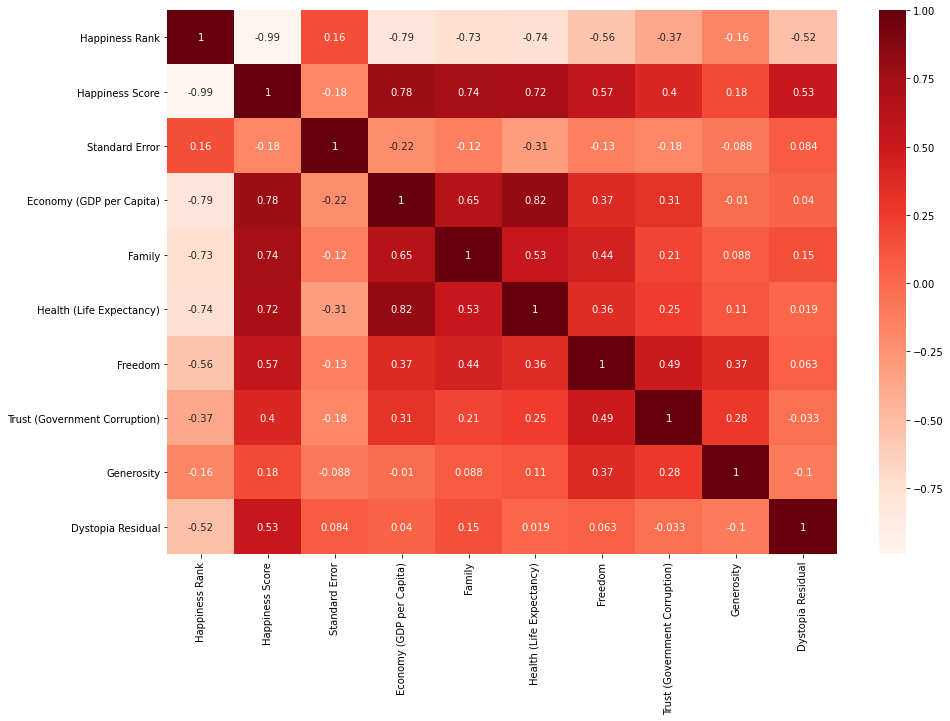

In [81]:
fig=plt.figure(figsize=(15,10))
hs=df.corr()
sns.heatmap(hs,annot=True,cmap='Reds')

Happiness rank and Happiness score are used for same measurement
Let's remove the Happiness rank from the analysis

In [82]:
df.drop(columns=['Happiness Rank'],axis=1,inplace=True)
df.head()

,Country,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


<AxesSubplot:>

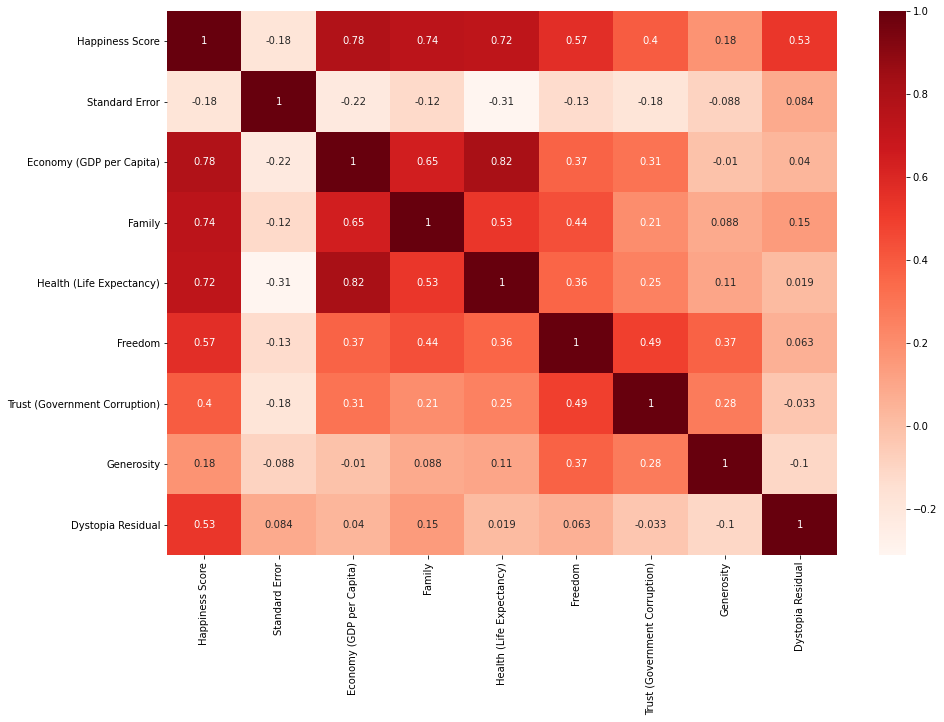

In [83]:
fig=plt.figure(figsize=(15,10))
hs=df.corr()
sns.heatmap(hs,annot=True,cmap='Reds')

1. The features Economy, Family and Health contribute majorly to the happiness score
2. Generosity and Trust has the least impact on the happiness score

Now, let's see how the data of each feature is distributed

In [84]:
#Renaming the columns to make it easier for analysis 
df.rename(columns={'Health (Life Expectancy)':'Health','Trust (Government Corruption)':'Trust','Economy (GDP per Capita)':'Economy'},inplace=True)
df.head()

,Country,Region,Happiness Score,Standard Error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual
0,Switzerland,Western Europe,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


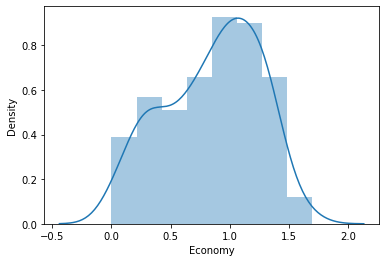

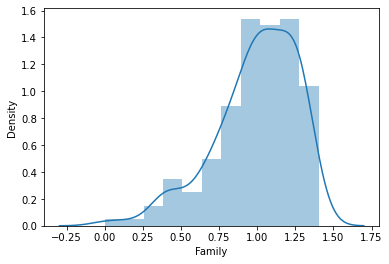

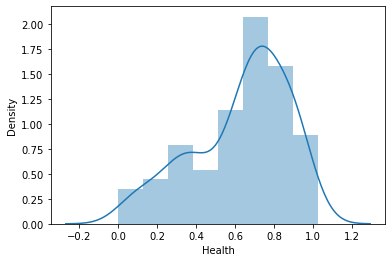

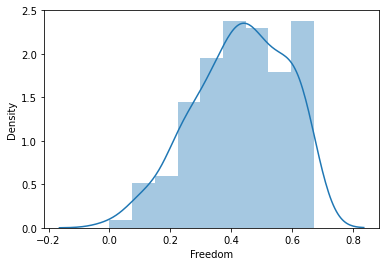

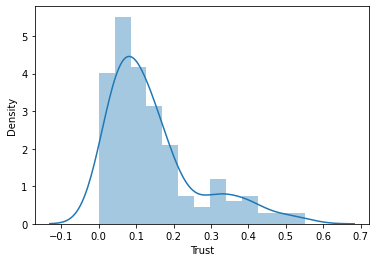

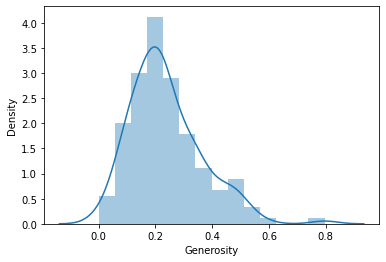

In [85]:
columns = ['Economy','Family','Health','Freedom','Trust','Generosity']

for i in df[columns]:
    plt.figure()
    sns.distplot(df[i])

1. The features Economy and Freedom are almost normally distributed
2. Outliers are present in Family Trust and Genorisity features

Happiness Score         AxesSubplot(0.125,0.125;0.0731132x0.755)
Standard Error       AxesSubplot(0.212736,0.125;0.0731132x0.755)
Economy              AxesSubplot(0.300472,0.125;0.0731132x0.755)
Family               AxesSubplot(0.388208,0.125;0.0731132x0.755)
Health               AxesSubplot(0.475943,0.125;0.0731132x0.755)
Freedom              AxesSubplot(0.563679,0.125;0.0731132x0.755)
Trust                AxesSubplot(0.651415,0.125;0.0731132x0.755)
Generosity           AxesSubplot(0.739151,0.125;0.0731132x0.755)
Dystopia Residual    AxesSubplot(0.826887,0.125;0.0731132x0.755)
dtype: object

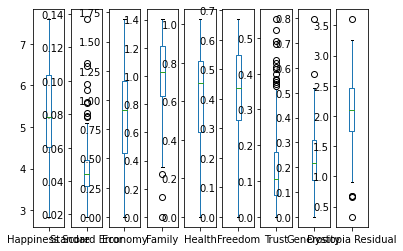

In [86]:
df.plot(kind='box',subplots=True)

<AxesSubplot:xlabel='Trust'>

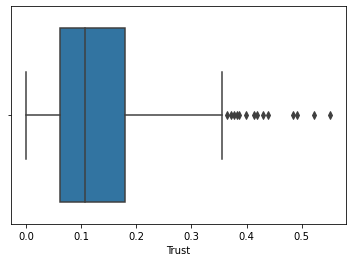

In [87]:
sns.boxplot(df['Trust'])

<AxesSubplot:xlabel='Generosity'>

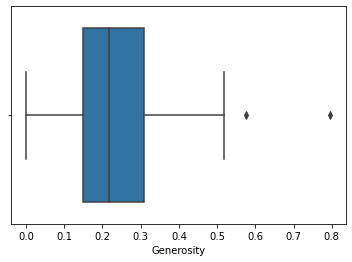

In [88]:
sns.boxplot(df['Generosity'])

In [89]:
df.head()

,Country,Region,Happiness Score,Standard Error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual
0,Switzerland,Western Europe,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


The Country feature does not have any impact on the happiness, so let's drop the feature

In [90]:
df.drop(columns=['Country'],axis=1,inplace=True)
df.head()

,Region,Happiness Score,Standard Error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual
0,Western Europe,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Western Europe,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Western Europe,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Western Europe,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,North America,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [91]:
le=LabelEncoder()
df['Region']=le.fit_transform(df['Region'])
df.head()

,Region,Happiness Score,Standard Error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual
0,9,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,9,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,9,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,9,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [92]:
z=np.abs(zscore(df))
z

array([[1.30025593, 1.93736005, 0.80592569, ..., 2.30965159, 0.47103971,
        0.75825809],
       [1.30025593, 1.91458063, 0.05588945, ..., 0.01647953, 1.57585637,
        1.09285682],
       [1.30025593, 1.88479215, 0.8544869 , ..., 2.8427738 , 0.8242928 ,
        0.71233526],
       ...,
       [0.37544095, 2.0761992 , 0.13253425, ..., 0.38141902, 1.85689094,
        3.20843049],
       [0.96511655, 2.1646885 , 2.26396166, ..., 0.35771452, 0.31694987,
        0.48198451],
       [0.96511655, 2.22251319, 1.13418227, ..., 0.30180313, 0.5581534 ,
        0.96361241]])

In [93]:
print(np.where(z>3))

(array([ 27,  40,  64, 115, 128, 147, 153, 155, 157], dtype=int64), array([7, 2, 2, 2, 8, 4, 7, 9, 4], dtype=int64))


In [94]:
df_new=df[(z<3).all(axis=1)]

In [95]:
df_new.shape

(149, 10)

In [96]:
#We have lost 9 rows of data because we have removed the outliers

In [97]:
#Percentage of lost data
100-(149/158*100)

5.696202531645568

We have lost around 6% data after removing the outliers

In [98]:
df_new.skew()

Region              -0.096985
Happiness Score      0.169740
Standard Error       1.243048
Economy             -0.390657
Family              -0.811340
Health              -0.747711
Freedom             -0.400867
Trust                1.272530
Generosity           0.654710
Dystopia Residual   -0.021144
dtype: float64

Creating a new df for Happiness score for output

In [99]:
df_x=df_new.drop(columns=["Happiness Score"])
df_y=df_new[['Happiness Score']]

In [100]:
df_x.skew()

Region              -0.096985
Standard Error       1.243048
Economy             -0.390657
Family              -0.811340
Health              -0.747711
Freedom             -0.400867
Trust                1.272530
Generosity           0.654710
Dystopia Residual   -0.021144
dtype: float64

We notice even after using .skew(), there is still so skew data.

Let us use the cube root/square root method to skew the data

In [101]:
df_x['Standard Error']=np.cbrt(df_x['Standard Error'])
df_x['Standard Error'].skew()

0.5283949780601277

In [102]:
df_x['Family']=np.square(df_x['Family'])
df_x['Family'].skew()

-0.23963272601507266

In [103]:
df_x['Health']=np.square(df_x['Health'])
df_x['Health'].skew()

-0.056314620243834615

In [104]:
df_x['Trust']=np.cbrt(df_x['Trust'])
df_x['Trust'].skew()

-0.0645677925993089

In [105]:
df_x.skew()

Region              -0.096985
Standard Error       0.528395
Economy             -0.390657
Family              -0.239633
Health              -0.056315
Freedom             -0.400867
Trust               -0.064568
Generosity           0.654710
Dystopia Residual   -0.021144
dtype: float64

In [106]:
print(df_x.shape)
print(df_y.shape)

(149, 9)
(149, 1)


In [107]:
x_train,x_test,y_train,y_test=train_test_split(df_x,df_y,test_size=.33,random_state=41)

In [108]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(x_test.shape)

(99, 9)
(50, 9)
(99, 1)
(50, 9)


In [109]:
lm = LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [110]:
lm.score(x_train,y_train)

0.9972634898628904